In [25]:
# !pip install alphalens
# !pip install pandas-ta
# !pip install feature_engine
# !pip install pandas==0.25.0

  Using cached pandas-0.25.0-cp37-cp37m-manylinux1_x86_64.whl (10.4 MB)
ERROR: feature-engine 0.5.17 has requirement pandas>=1.0.3, but you'll have pandas 0.25.0 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import pickle
import itertools
from datetime import datetime
import alphalens
from alphalens.performance import mean_information_coefficient

In [3]:
print(pd.__version__)

0.25.0


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [4]:
Prices = pickle.load(open('Prices.pkl', 'rb'))

In [5]:
train_start = datetime(2016, 1, 1)
train_end = datetime(2017, 12, 31)

trainPrices = {}
for symbol, data in Prices.items():
    trainPrices[symbol] = data.loc[train_start:train_end]

In [6]:
whl = trainPrices['WHL.JO'].copy()
whl.head()

high      low     open    close     volume    adj_close
Date                                                                  
2016-01-01  10015.0  10015.0  10015.0  10015.0        0.0  8272.963867
2016-01-04   9889.0   9571.0   9760.0   9605.0  1972991.0  7934.280273
2016-01-05   9912.0   9550.0   9630.0   9880.0  2359678.0  8161.446777
2016-01-06   9920.0   9645.0   9788.0   9788.0  2946740.0  8085.449219
2016-01-07   9763.0   9120.0   9600.0   9660.0  5489329.0  7979.713867

In [7]:
ema26 = ta.ema(whl['adj_close'], length = 26)
ema12 = ta.ema(whl['adj_close'], length = 12)

whl['ema26'] = ema26
whl['ema12'] = ema12

whl['macd'] = ema12 - ema26
whl['macd_signal_line'] = ta.ema(whl['macd'], length = 9)

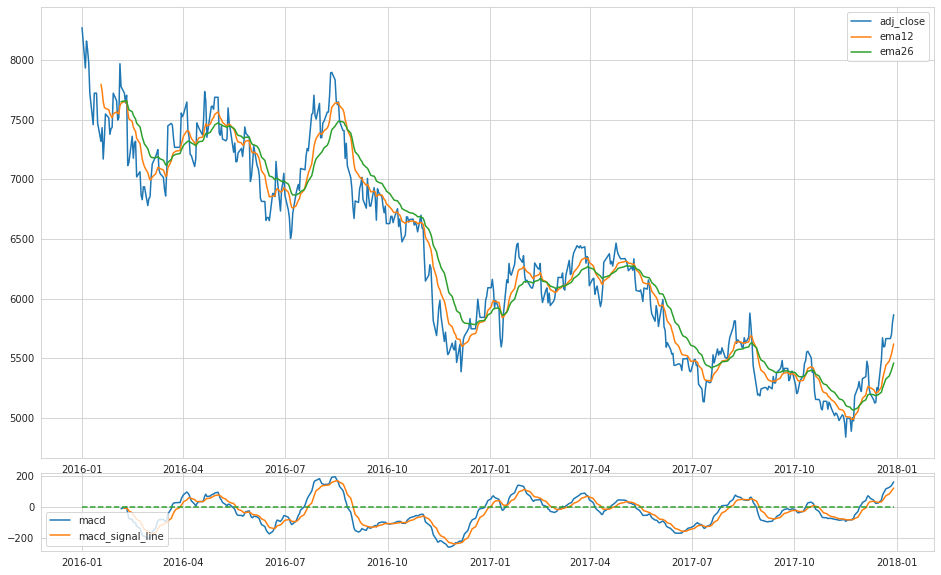

In [8]:
fig = plt.figure(figsize = (16, 10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(whl.index, whl['adj_close'])
ax1.plot(whl.index, whl['ema12'])
ax1.plot(whl.index, whl['ema26'])
ax1.legend(('adj_close', 'ema12', 'ema26', ))
ax1.set_xticklabels(' ')

ax2.plot(whl.index, whl['macd'])
ax2.plot(whl.index, whl['macd_signal_line'])
ax2.plot(whl.index, list(itertools.repeat(0, len(whl.index))), linestyle = 'dashed')
ax2.legend(('macd', 'macd_signal_line', ), loc = 'lower left')

In [9]:
# 2017-01-18	
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 10):datetime(2017, 1, 20)]

high     low    open     close   volume      adj_close
Date                                                                
2017-01-10  3489.0  3430.0  3475.0    3445.0  69398.0    3444.051270
2017-01-11  3465.0  3445.0  3455.0    3466.0   6426.0    3465.045410
2017-01-12  3440.0  3370.0  3440.0    3363.0  64075.0    3362.073730
2017-01-13  3400.0  3390.0  3390.0    3386.0  21058.0    3385.067383
2017-01-16  3419.0  3380.0  3395.0    3400.0   7148.0    3399.063477
2017-01-17  3385.0  3355.0  3380.0    3358.0  10926.0    3357.075195
2017-01-18  3415.0  3395.0  3395.0    3400.0   7366.0    3399.063477
2017-01-19  3405.0  3405.0  3405.0  340500.0  24398.0  340406.218750
2017-01-20  3370.0  3350.0  3370.0    3365.0   8243.0    3364.073242

In [10]:
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'close'] = 3405.00
trainPrices['GLPROP.JO'].loc[datetime(2017, 1, 19), 'adj_close'] = 3404.06218750

In [11]:
# 2017-07-12	
trainPrices['SCD.JO'].loc[datetime(2016, 1, 1):datetime(2017, 6, 30)]#['close'].plot()

high          low         open        close    volume  \
Date                                                                       
2016-01-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-02-29       0.9800       0.9800       0.9800       0.9800       0.0   
2016-03-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-04-29       1.0426       1.0426       1.0426       1.0426       0.0   
2016-05-31       1.0426       1.0426       1.0426       1.0426       0.0   
2016-06-30       1.0770       1.0770       1.0770       1.0770       0.0   
2016-07-29       1.0770       1.0770       1.0770       1.0770       0.0   
2016-08-31       1.0770       1.0770       1.0770       1.0770       0.0   
2016-09-30       1.1239       1.1239       1.1239       1.1239       0.0   
2016-10-31       1.1239       1.1239       1.1239       1.1239       0.0   
2016-11-30       1.1239       1.1239       1.1239       1.1239       0.0   
2017-01-31       1.1000       1.1000       1.1000       1.1000       0.0   
2017-02-28       1.1000       1.1000       1.1000       1.1000       0.0   
2017-03-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-04-28       1.1066       1.1066       1.1066       1.1066       0.0   
2017-05-31       1.1066       1.1066       1.1066       1.1066       0.0   
2017-06-09  183400.0000  182000.0000  183400.0000  182000.0000   55547.0   
2017-06-12  184500.0000  181600.0000  184500.0000  184500.0000    9676.0   
2017-06-13  184500.0000  182100.0000  182900.0000  183000.0000  122820.0   
2017-06-14  184500.0000  184000.0000  184000.0000  184000.0000   43226.0   
2017-06-15  184500.0000  184200.0000  184500.0000  184500.0000  183360.0   
2017-06-16  184500.0000  184500.0000  184500.0000  184500.0000       0.0   
2017-06-19  185900.0000  180100.0000  184500.0000  180100.0000  121717.0   
2017-06-20  184500.0000  183700.0000  184200.0000  183700.0000  110578.0   
2017-06-21  186000.0000  182500.0000  183700.0000  182500.0000    9868.0   
2017-06-22  187000.0000  183000.0000  183000.0000  187000.0000    3420.0   
2017-06-23  190000.0000  183600.0000  187000.0000  190000.0000   23681.0   
2017-06-26  193200.0000  190000.0000  191400.0000  190000.0000  360473.0   
2017-06-27  194000.0000  185200.0000  185300.0000  194000.0000  136528.0   
2017-06-28  197200.0000  192000.0000  192000.0000  194300.0000   11730.0   
2017-06-29  198000.0000  194300.0000  194300.0000  196000.0000   14799.0   
2017-06-30  200100.0000  196500.0000  196500.0000  200100.0000   26023.0   

                adj_close  
Date                       
2016-01-29       0.979231  
2016-02-29       0.979231  
2016-03-31       1.041782  
2016-04-29       1.041782  
2016-05-31       1.041782  
2016-06-30       1.076155  
2016-07-29       1.076155  
2016-08-31       1.076155  
2016-09-30       1.123018  
2016-10-31       1.123018  
2016-11-30       1.123018  
2017-01-31       1.099137  
2017-02-28       1.099137  
2017-03-31       1.105732  
2017-04-28       1.105732  
2017-05-31       1.105732  
2017-06-09  181857.234375  
2017-06-12  184355.250000  
2017-06-13  182856.437500  
2017-06-14  183855.656250  
2017-06-15  184355.250000  
2017-06-16  184355.250000  
2017-06-19  179958.718750  
2017-06-20  183555.906250  
2017-06-21  182357.890625  
2017-06-22  186854.359375  
2017-06-23  189852.031250  
2017-06-26  189852.031250  
2017-06-27  193848.906250  
2017-06-28  194148.718750  
2017-06-29  195847.390625  
2017-06-30  199944.187500

In [12]:
scd = trainPrices['SCD.JO']
trainPrices['SCD.JO'] = scd.loc[datetime(2017, 6, 1):]

In [13]:
trainPrices['SCD.JO'].head()

high       low      open     close    volume      adj_close
Date                                                                       
2017-06-09  183400.0  182000.0  183400.0  182000.0   55547.0  181857.234375
2017-06-12  184500.0  181600.0  184500.0  184500.0    9676.0  184355.250000
2017-06-13  184500.0  182100.0  182900.0  183000.0  122820.0  182856.437500
2017-06-14  184500.0  184000.0  184000.0  184000.0   43226.0  183855.656250
2017-06-15  184500.0  184200.0  184500.0  184500.0  183360.0  184355.250000

In [14]:
%time
macd_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        norm_close = data['close']#.div(data['close'][0])
        
        ema26 = ta.ema(norm_close, length = 26)
        ema12 = ta.ema(norm_close, length = 12)
        macd = ema12.sub(ema26)
        macd_ema9 = ta.ema(macd, length = 9)
        macd_signal = macd_ema9.sub(macd)

        macd_signal.name = 'macd_signal'
        out = pd.DataFrame(macd_signal)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        macd_data = pd.concat([macd_data, out])
        # print(i, symbol)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


In [15]:
macd_data.tail()

macd_signal
Date       symbol              
2017-12-25 ZPLP.JO   -53.718039
2017-12-26 ZPLP.JO   -47.688752
2017-12-27 ZPLP.JO   -40.354182
2017-12-28 ZPLP.JO   -32.111094
2017-12-29 ZPLP.JO   -23.848948

In [16]:
prices_data = pd.DataFrame()
for symbol, data in trainPrices.items():
    out = data['close']
    out.name = symbol
    prices_data = pd.concat([prices_data, out], axis = 1)

In [17]:
prices_data.index = pd.to_datetime(prices_data.index)

In [18]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor = macd_data,
    prices = prices_data,
    quantiles = 3,
    periods = [1, 2, 5, 10, 30]
)
factor_data

Dropped 11.4% entries from factor data: 11.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        2D        5D       10D       30D  \
date       asset                                                       
2016-02-08 ABG.JO  -0.025883  0.004604  0.095019  0.071578  0.046463   
2016-02-09 ABG.JO   0.031297  0.007233  0.081501  0.056793  0.059944   
2016-02-10 ABG.JO  -0.023333  0.017361  0.048264  0.013889  0.005208   
2016-02-11 ABG.JO   0.041667  0.116041  0.119454  0.051337  0.009670   
2016-02-12 ABG.JO   0.071399  0.030785  0.033311 -0.011399 -0.030717   
...                      ...       ...       ...       ...       ...   
2017-11-13 ZPLP.JO -0.009060 -0.015556  0.008547 -0.015385  0.093162   
2017-11-14 ZPLP.JO -0.006555  0.017768 -0.006555 -0.006555  0.103157   
2017-11-15 ZPLP.JO  0.024483  0.024483  0.024310  0.041674  0.110089   
2017-11-16 ZPLP.JO  0.000000  0.000000 -0.000169  0.008475  0.082203   
2017-11-17 ZPLP.JO  0.000000 -0.023898 -0.011864  0.004746  0.081356   

                       factor  factor_quantile  
date       asset                                
2016-02-08 ABG.JO  -10.213436                1  
2016-02-09 ABG.JO   11.555064                3  
2016-02-10 ABG.JO    0.637074                2  
2016-02-11 ABG.JO   19.133765                3  
2016-02-12 ABG.JO   -3.786114                1  
...                       ...              ...  
2017-11-13 ZPLP.JO   4.323478                3  
2017-11-14 ZPLP.JO   4.722032                3  
2017-11-15 ZPLP.JO   7.317416                3  
2017-11-16 ZPLP.JO  -0.286363                1  
2017-11-17 ZPLP.JO  -4.885235                1  

[138756 rows x 7 columns]

In [19]:
alphalens.plotting.plot_quantile_statistics_table(factor_data)

Quantiles Statistics


min          max       mean         std  count  \
factor_quantile                                                           
1               -2066.242707     0.004138 -38.450657  102.637373  46447   
2                 -13.088489     8.590519  -0.026288    1.578661  46091   
3                  -0.187724  2804.055990  37.906887  100.153457  46218   

                   count %  
factor_quantile             
1                33.473868  
2                33.217302  
3                33.308830

Information Analysis


1D     2D      5D     10D     30D
IC Mean           0.039  0.056   0.064   0.062   0.066
IC Std.           0.147  0.146   0.141   0.136   0.134
Risk-Adjusted IC  0.266  0.383   0.456   0.457   0.496
t-stat(IC)          NaN    NaN   9.816   9.847  10.686
p-value(IC)         NaN    NaN   0.000   0.000   0.000
IC Skew             NaN    NaN   1.749   0.488   1.988
IC Kurtosis         NaN    NaN  11.401  16.348  13.636

<Figure size 432x288 with 0 Axes>

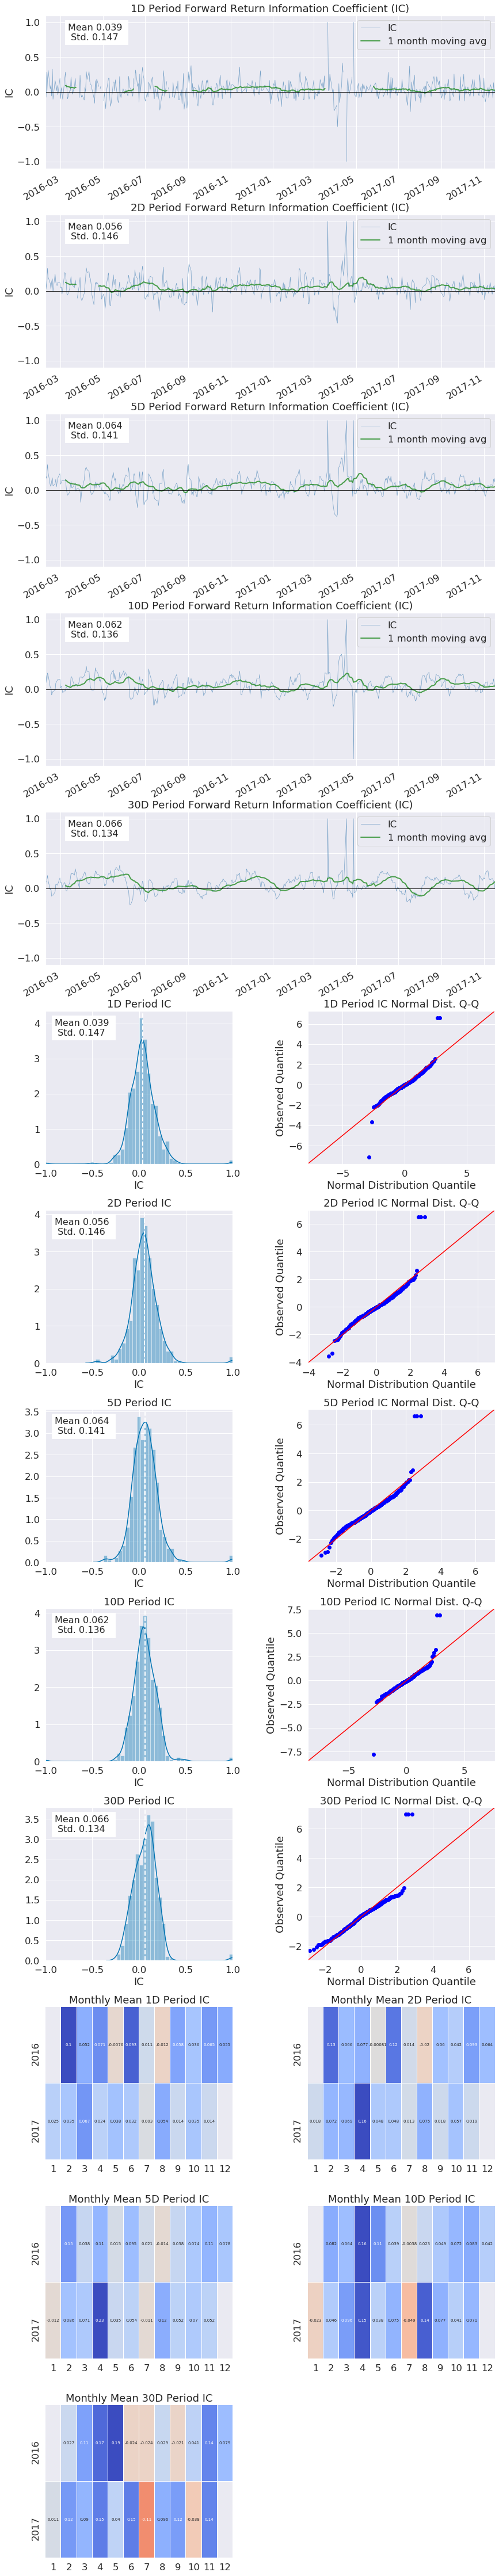

In [20]:
alphalens.tears.create_information_tear_sheet(factor_data)

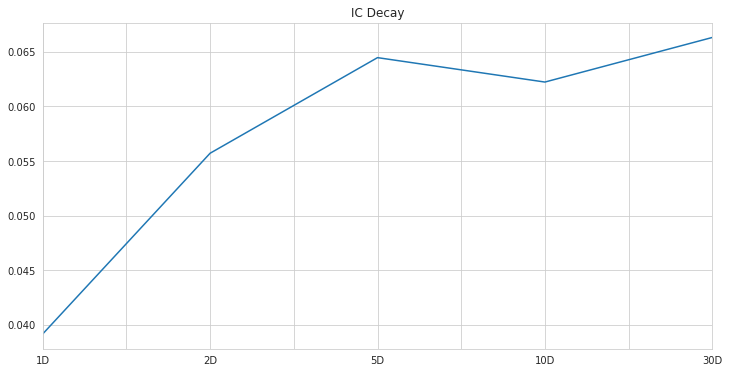

In [21]:
fig = plt.figure(figsize = (12, 6))
g = mean_information_coefficient(factor_data).plot(title = "IC Decay")

Returns Analysis


1D      2D      5D    10D  \
Ann. alpha                                      0.101   0.251   0.099  0.063   
beta                                            0.635  -0.000   0.359  0.205   
Mean Period Wise Return Top Quantile (bps)     18.305  14.387   8.732  5.285   
Mean Period Wise Return Bottom Quantile (bps) -19.677 -14.395  -8.244 -4.451   
Mean Period Wise Spread (bps)                  37.982  28.787  16.997  9.743   

                                                 30D  
Ann. alpha                                     0.064  
beta                                          -0.084  
Mean Period Wise Return Top Quantile (bps)     2.468  
Mean Period Wise Return Bottom Quantile (bps) -1.754  
Mean Period Wise Spread (bps)                  4.225

<Figure size 432x288 with 0 Axes>

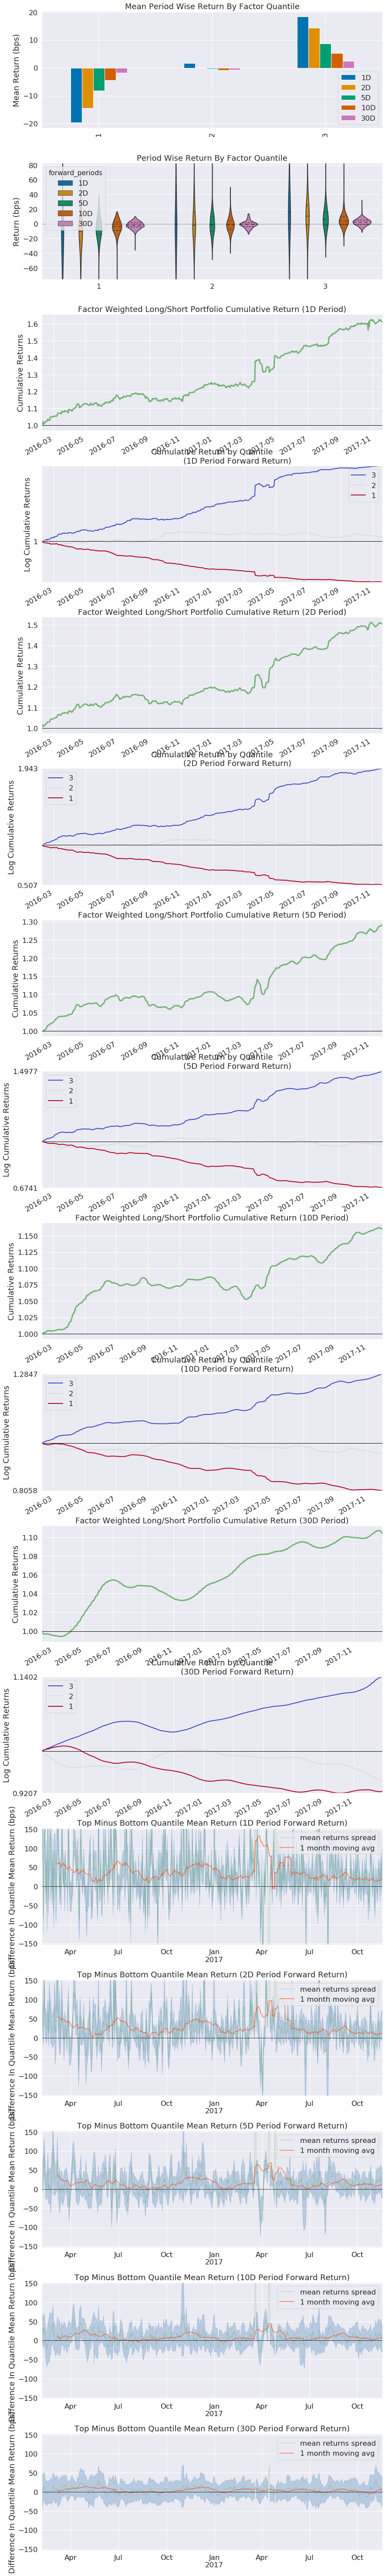

In [22]:
alphalens.tears.create_returns_tear_sheet(factor_data)

In [23]:
%time
volume_data = pd.DataFrame()
for i, (symbol, data) in enumerate(trainPrices.items()):
    if len(data) > 100:
        data = data.copy()
        volume = data['volume']
        
        vol_sma20 = ta.sma(volume, length = 5)

        vol_sma20.name = 'volume_oscillator20'
        out = pd.DataFrame(vol_sma20)
        out['symbol'] = symbol
        out = out.reset_index().set_index(['Date', 'symbol'])

        volume_data = pd.concat([volume_data, out])
        # print(i, symbol)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [24]:
volume_data['volume_oscillator20'].median()

79372.2

In [25]:
from feature_engine.discretisers import EqualFrequencyDiscretiser

X = volume_data[['volume_oscillator20']].dropna()

desc = EqualFrequencyDiscretiser(q = 3, variables = 'volume_oscillator20', return_boundaries = True)
out = desc.fit_transform(X)

In [26]:
out['volume_oscillator20'].value_counts()

(-inf, 20077.6]        51764
(284159.4, inf]        51763
(20077.6, 284159.4]    51763
Name: volume_oscillator20, dtype: int64

In [27]:
group_names = ['low', 'medium', 'high'] #'extremely low', , 'extremely high'
group_boundaries = out['volume_oscillator20'].sort_values().unique()
group_mappings = dict(list(zip(group_boundaries, group_names)))
group_mappings

{Interval(-inf, 20077.6, closed='right'): 'low',
 Interval(20077.6, 284159.4, closed='right'): 'medium',
 Interval(284159.4, inf, closed='right'): 'high'}

In [28]:
volume_osc = out['volume_oscillator20'].map(group_mappings)

In [29]:
# factor_data.drop(['group', 'volume_oscillator20'], axis = 1, inplace = True)

In [30]:
factor_data = pd.concat([factor_data, volume_osc], axis = 1).dropna()
factor_data.head()

1D        2D        5D       10D       30D  \
2016-02-08 ABG.JO  -0.025883  0.004604  0.095019  0.071578  0.046463   
           ABSP.JO  0.006883  0.002069 -0.030345  0.001379  0.041379   
           ACE.JO  -0.100000 -0.100000  0.071429  0.071429  0.214286   
           ACG.JO  -0.010081 -0.005376 -0.018817 -0.022177  0.008065   
           ACL.JO  -0.072427 -0.186785  0.008895 -0.047014  0.188056   

                       factor  factor_quantile volume_oscillator20  
2016-02-08 ABG.JO  -10.213436              1.0                high  
           ABSP.JO  43.819989              3.0                 low  
           ACE.JO    0.246629              3.0              medium  
           ACG.JO   -2.168529              1.0              medium  
           ACL.JO   -5.412822              1.0                high

In [31]:
factor_data = factor_data.reset_index().rename(columns = 
                                               {'level_0':'date', 
                                                'level_1':'asset', 
                                                'volume_oscillator20':'group'}).set_index(['date', 'asset'])

In [ ]:
alphalens.tears.create_returns_tear_sheet(factor_data, by_group = True)